#Assignment Machine Learning GDSC Unand
##Predict Term Deposit


* Rifqi Asverian Putra
* Sistem Informasi, Universitas Andalas
* rifqiasverian16@gmail.com
* Instagram: [__asvrn](https://instagram.com/__asvrn)



#Import Data

In [1]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/asvrn/MLBasic/main/nasabah.csv")
data.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
data.shape

(45211, 18)

Terlihat bahwa dataset terdiri dari 45211 baris (sampel) dan sudah melewati syarat untuk dataset >2500 sampel

#Assesing & Cleaning Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


Terlihat bahwa beberapa kolom memiliki data yang kosong, yaitu age dan balance

In [4]:
data.dropna(inplace=True)
data.isnull().sum()

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Disini saya memilih untuk menghapus baris data yang terdapat data yang kosong dengan pertimbangan waktu dan jumlah sampel yang cukup banyak. Terlihat bahwa data yang memiliki nilai yang kosong sudah tidak ada.

In [5]:
data.duplicated().sum()

0

Tidak ada data duplikat

In [6]:
data.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000
mean,23611.490686,40.954292,1362.565686,15.809049,258.141637,2.764270,40.207854,0.580465
std,13048.276539,11.539117,3045.076372,8.321781,257.438318,3.098276,100.138866,2.303704
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12311.750000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23611.500000,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34911.250000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Disini terlihat bahwa kolom age terdapat invalid value, yaitu usia terkecil dengan nilai -1 dan usia maksimal dengan nilai 999

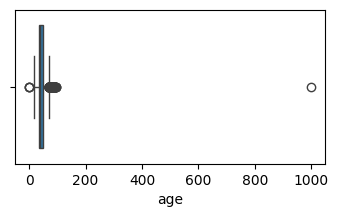

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 2))
sns.boxplot(x=data['age'])
plt.show()

Melihat outliers pada kolom age dengan boxplot

In [8]:
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)

lower_bound = q1 - 1.5 * (q3 - q1)
upper_bound = q3 + 1.5 * (q3 - q1)

data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

Menghapus outliers yang ada

In [9]:
data.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000
mean,23411.882152,40.545784,1345.665690,15.815567,257.344822,2.771214,40.012838,0.573608
std,12970.130388,9.978000,2983.615234,8.324234,257.346268,3.108917,100.206666,2.301073
min,1002.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12190.250000,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23367.500000,39.000000,442.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,34604.750000,48.000000,1408.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,46211.000000,70.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Sekarang data sudah terlihat masuk akal

In [10]:
data = data.drop('Id', axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no


Menghapus kolom Id karena tidak digunakan

In [11]:
data['job'] = data['job'].map({"admin.": 0, "unknown": 1, "unemployed": 2, "management":3, "housemaid":4, "entrepreneur":5, "student":6, "blue-collar":7, "self-employed":8, "retired":9, "technician":10, "services":11})
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,10,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,5,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,7,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,1,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,3,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,53.0,3,married,tertiary,no,583.0,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34.0,0,single,secondary,no,557.0,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45206,51.0,10,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45209,57.0,7,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Mengubah data pada kolom job menjadi numerik

In [12]:
data['marital'] = data['marital'].map({"married":0, "divorced":1, "single":2})
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,10,2,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,5,0,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,7,0,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,1,2,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,3,0,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no


Mengubah data pada kolom marital menjadi numerik

In [13]:
data['education'] = data['education'].map({"unknown":0, "primary":1, "secondary":2, "tertiary":3})
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,10,2,2,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,5,0,2,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,7,0,0,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,1,2,0,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,3,0,3,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no


Mengubah data pada kolom education menjadi numerik

In [14]:
data['default'] = data['default'].map({"no":0, "yes":1})
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,10,2,2,0,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,5,0,2,0,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,7,0,0,0,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,1,2,0,0,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,3,0,3,0,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no


Mengubah data pada kolom default menjadi numerik

In [15]:
data['housing'] = data['housing'].map({"no":0, "yes":1})
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,10,2,2,0,29.0,1,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,5,0,2,0,2.0,1,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,7,0,0,0,1506.0,1,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,1,2,0,0,1.0,0,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,3,0,3,0,231.0,1,no,unknown,5,may,139,1,-1,0,unknown,no


Mengubah data pada kolom housing menjadi numerik

In [16]:
data['loan'] = data['loan'].map({"no":0, "yes":1})
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,10,2,2,0,29.0,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,5,0,2,0,2.0,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,7,0,0,0,1506.0,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,1,2,0,0,1.0,0,0,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,3,0,3,0,231.0,1,0,unknown,5,may,139,1,-1,0,unknown,no


Mengubah data pada kolom loan menjadi numerik

In [17]:
data['contact'] = data['contact'].map({"unknown":0, "telephone":1, "cellular":2})
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,10,2,2,0,29.0,1,0,0,5,may,151,1,-1,0,unknown,no
2,33.0,5,0,2,0,2.0,1,1,0,5,may,76,1,-1,0,unknown,no
3,47.0,7,0,0,0,1506.0,1,0,0,5,may,92,1,-1,0,unknown,no
4,33.0,1,2,0,0,1.0,0,0,0,5,may,198,1,-1,0,unknown,no
5,35.0,3,0,3,0,231.0,1,0,0,5,may,139,1,-1,0,unknown,no


Mengubah data pada kolom contact menjadi numerik

In [18]:
data['month'] = data['month'].map({"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12})
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,10,2,2,0,29.0,1,0,0,5,5,151,1,-1,0,unknown,no
2,33.0,5,0,2,0,2.0,1,1,0,5,5,76,1,-1,0,unknown,no
3,47.0,7,0,0,0,1506.0,1,0,0,5,5,92,1,-1,0,unknown,no
4,33.0,1,2,0,0,1.0,0,0,0,5,5,198,1,-1,0,unknown,no
5,35.0,3,0,3,0,231.0,1,0,0,5,5,139,1,-1,0,unknown,no


Mengubah data pada kolom month menjadi numerik

In [19]:
data['poutcome'] = data['poutcome'].map({"unknown":0, "success":1, "failure":2, "other":3})
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,10,2,2,0,29.0,1,0,0,5,5,151,1,-1,0,0,no
2,33.0,5,0,2,0,2.0,1,1,0,5,5,76,1,-1,0,0,no
3,47.0,7,0,0,0,1506.0,1,0,0,5,5,92,1,-1,0,0,no
4,33.0,1,2,0,0,1.0,0,0,0,5,5,198,1,-1,0,0,no
5,35.0,3,0,3,0,231.0,1,0,0,5,5,139,1,-1,0,0,no


Mengubah data pada kolom poutcome menjadi numerik

In [20]:
data['y'] = data['y'].map({"no": 0, "yes": 1})
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,10,2,2,0,29.0,1,0,0,5,5,151,1,-1,0,0,0
2,33.0,5,0,2,0,2.0,1,1,0,5,5,76,1,-1,0,0,0
3,47.0,7,0,0,0,1506.0,1,0,0,5,5,92,1,-1,0,0,0
4,33.0,1,2,0,0,1.0,0,0,0,5,5,198,1,-1,0,0,0
5,35.0,3,0,3,0,231.0,1,0,0,5,5,139,1,-1,0,0,0


Mengubah data pada kolom y menjadi numerik

#Data Training & Testing

In [21]:
from sklearn.model_selection import train_test_split

fitur = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']

x = data[fitur]
y = data['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=20)

Menggunakan seluruh kolom menjadi fitur, kecuali kolom y (label)

#Create & Train Model

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=20)
model = model.fit(x_train, y_train)

In [24]:
from sklearn.metrics import accuracy_score

predict = model.predict(x_test)
print("Akurasinya adalah ", accuracy_score(y_test, predict))

Akurasinya adalah  0.8762021919033773


Akurasi sudah berada di atas 85%

##**BACA INFORMASI SEBELUM MELAKUKAN INPUTAN**
##Informasi perwakilan angka pada data


1. Job: 0 = admin., 1 = unknown, 2= unemployed, 3 = management, 4 = housemaid, 5 = entrepreneur", 6 = student, 7 = blue-collar, 8 = self-employed, 9 = retired, 10 = technician, 11 = services
2. Marital: 0 = married, 1 = divorced, 2 = single
3. Education: 0 = unknown, 1 = primary, 2 = secondary, 3 = tertiary
4. Default: 0 = no,  1 = yes
5. Housing: 0 = no,  1 = yes
6. Loan: 0 = no,  1 = yes
7. Contact: 0 = unknown, 1 = telephone, 2 = cellular
8. Month: 1 = jan, 2 = feb, 3 = mar, 4 = apr, 5 = may, 6 = jun, 7 = jul, 8 = aug, 9 = sep, 10 = oct, 11 = nov, 12 = dec
9. Poutcome: 0 = unknown, 1 = success, 2 = failure, 3 = other

#Predict

In [25]:
age = float(input("Masukkan usia: "))
job = int(input("Masukkan pekerjaan: "))
marital = int(input("Masukkan status pernikahan: "))
education = int(input("Masukkan tingkat pendidikan: "))
default = int(input("Apakah memiliki kredit dalam keadaan gagal bayar?: "))
balance = float(input("Masukkan rata-rata saldo tahunan (Euro): "))
housing = int(input("Apakah memiliki pinjaman rumah?: "))
loan = int(input("Apakah memiliki pinjaman pribadi?: "))
contact = int(input("Masukkan jenis komunikasi kontak: "))
day = int(input("Masukkan hari kontak terakhir dalam sebulan: "))
month = int(input("Masukkan bulan kontak terakhir dalam setahun: "))
duration = int(input("Masukkan lama kontak terakhir (detik): "))
campaign = int(input("Masukkan jumlah kontak yang dilakukan selama kampanye: "))
pdays = int(input("Masukkan kontak terakhir dari kampanye sebelumnya: "))
previous = int(input("Masukkan jumlah kontak yang dilakukan sebelum kampanye: "))
poutcome = int(input("Masukkan hasil dari kampanye sebelumnya: "))

user_data = pd.DataFrame([[age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome]], columns=fitur)

pred_result = model.predict(user_data)

pred_cat = {0: "Tidak", 1: "Iya"}
final_result = pred_cat[pred_result[0]]

print("Apakah klien bisa menggunakan deposit berjangka?: ", final_result)

Masukkan usia: 25.0
Masukkan pekerjaan: 7
Masukkan status pernikahan: 0
Masukkan tingkat pendidikan: 2
Apakah memiliki kredit dalam keadaan gagal bayar?: 0
Masukkan rata-rata saldo tahunan (Euro): 1000.0
Apakah memiliki pinjaman rumah?: 0
Apakah memiliki pinjaman pribadi?: 0
Masukkan jenis komunikasi kontak: 2
Masukkan hari kontak terakhir dalam sebulan: 2
Masukkan bulan kontak terakhir dalam setahun: 3
Masukkan lama kontak terakhir (detik): 300
Masukkan jumlah kontak yang dilakukan selama kampanye: 1
Masukkan kontak terakhir dari kampanye sebelumnya: -1
Masukkan jumlah kontak yang dilakukan sebelum kampanye: 4
Masukkan hasil dari kampanye sebelumnya: 1
Apakah klien bisa menggunakan deposit berjangka?:  Iya


Disini saya membuat inputan yang bagus-bagus saja dan terbukti model memprediksi bahwa orang dengan data di atas bisa (layak) menggunakan deposit berjangka

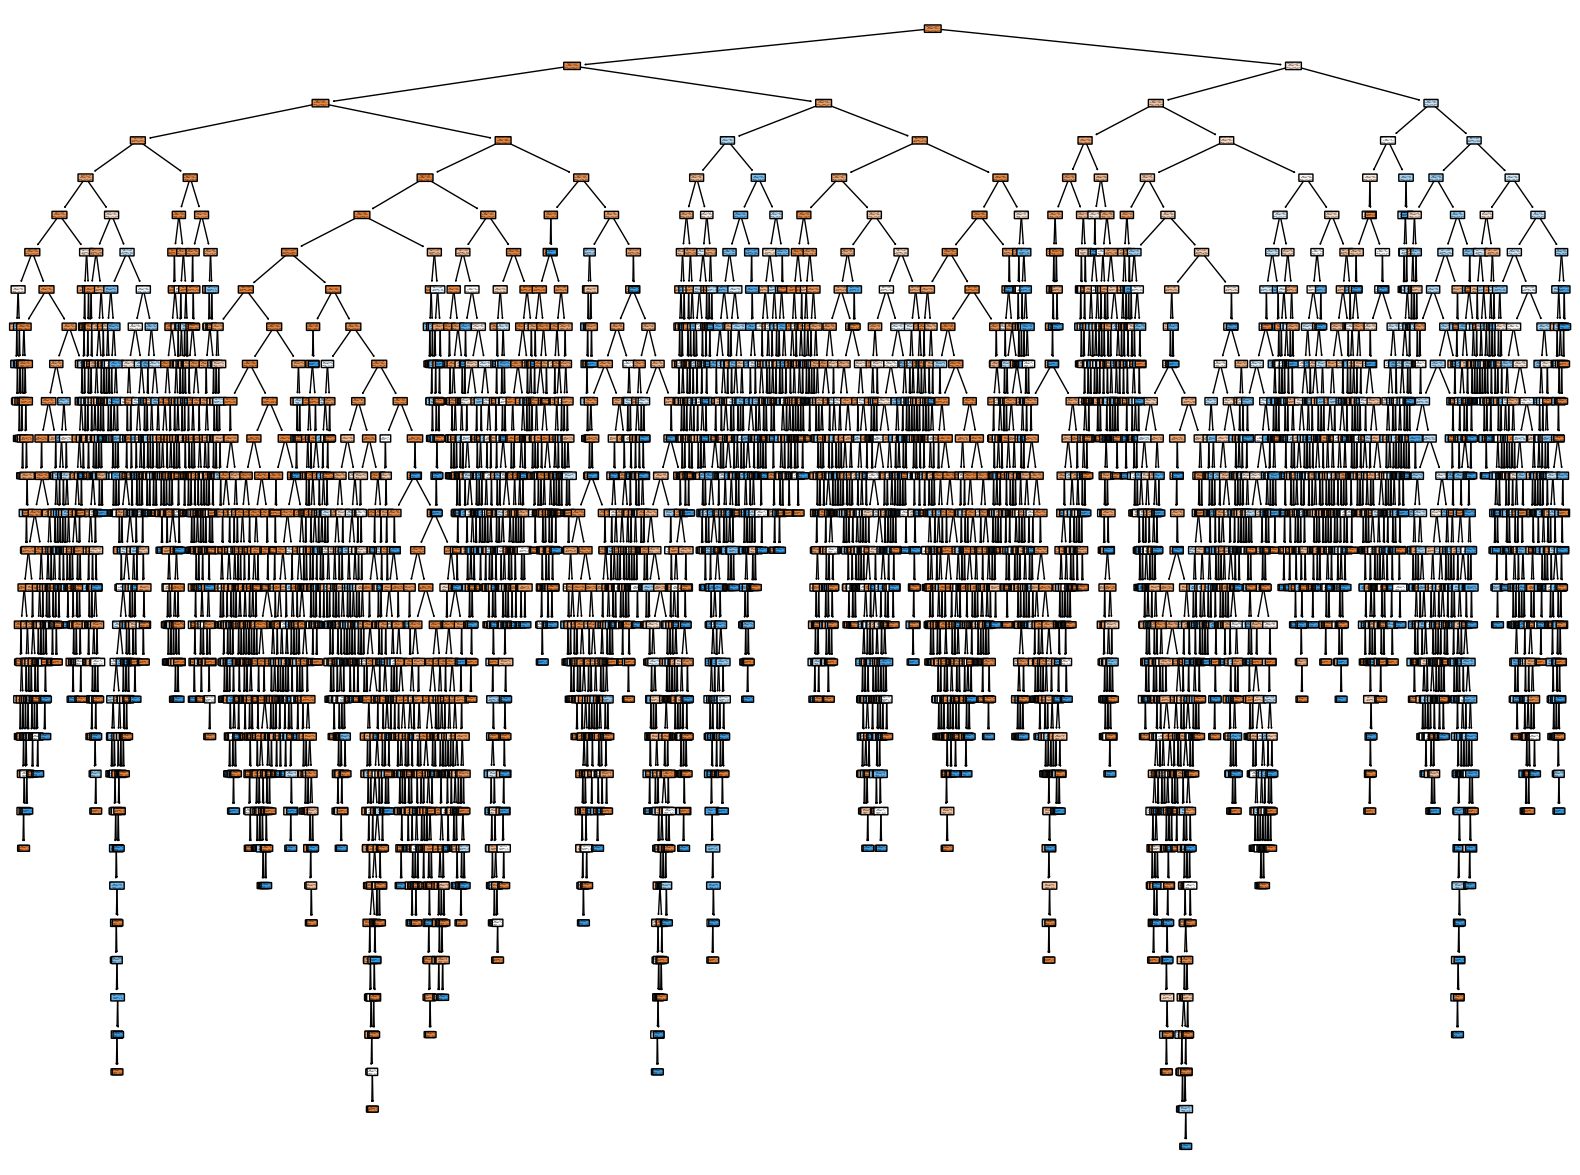

In [26]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(model, feature_names = fitur, class_names = ["Tidak", "Iya"], filled = True, rounded = True)
plt.show()

In [27]:
age = float(input("Masukkan usia: "))
job = int(input("Masukkan pekerjaan: "))
marital = int(input("Masukkan status pernikahan: "))
education = int(input("Masukkan tingkat pendidikan: "))
default = int(input("Apakah memiliki kredit dalam keadaan gagal bayar?: "))
balance = float(input("Masukkan rata-rata saldo tahunan (Euro): "))
housing = int(input("Apakah memiliki pinjaman rumah?: "))
loan = int(input("Apakah memiliki pinjaman pribadi?: "))
contact = int(input("Masukkan jenis komunikasi kontak: "))
day = int(input("Masukkan hari kontak terakhir dalam sebulan: "))
month = int(input("Masukkan bulan kontak terakhir dalam setahun: "))
duration = int(input("Masukkan lama kontak terakhir (detik): "))
campaign = int(input("Masukkan jumlah kontak yang dilakukan selama kampanye: "))
pdays = int(input("Masukkan kontak terakhir dari kampanye sebelumnya: "))
previous = int(input("Masukkan jumlah kontak yang dilakukan sebelum kampanye: "))
poutcome = int(input("Masukkan hasil dari kampanye sebelumnya: "))

user_data = pd.DataFrame([[age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome]], columns=fitur)

pred_result = model.predict(user_data)

pred_cat = {0: "Tidak", 1: "Iya"}
final_result = pred_cat[pred_result[0]]

print("Apakah klien bisa menggunakan deposit berjangka?: ", final_result)

Masukkan usia: 44.0
Masukkan pekerjaan: 2
Masukkan status pernikahan: 1
Masukkan tingkat pendidikan: 0
Apakah memiliki kredit dalam keadaan gagal bayar?: 1
Masukkan rata-rata saldo tahunan (Euro): 200.0
Apakah memiliki pinjaman rumah?: 1
Apakah memiliki pinjaman pribadi?: 1
Masukkan jenis komunikasi kontak: 2
Masukkan hari kontak terakhir dalam sebulan: 2
Masukkan bulan kontak terakhir dalam setahun: 3
Masukkan lama kontak terakhir (detik): 100
Masukkan jumlah kontak yang dilakukan selama kampanye: 1
Masukkan kontak terakhir dari kampanye sebelumnya: -1
Masukkan jumlah kontak yang dilakukan sebelum kampanye: 0
Masukkan hasil dari kampanye sebelumnya: 2
Apakah klien bisa menggunakan deposit berjangka?:  Tidak


Dan disini saya mengisi input yang buruk dan model memprediksi bahwa orang dengan data di atas tidak bisa atau tidak layak untuk menggunakan deposit berjangka

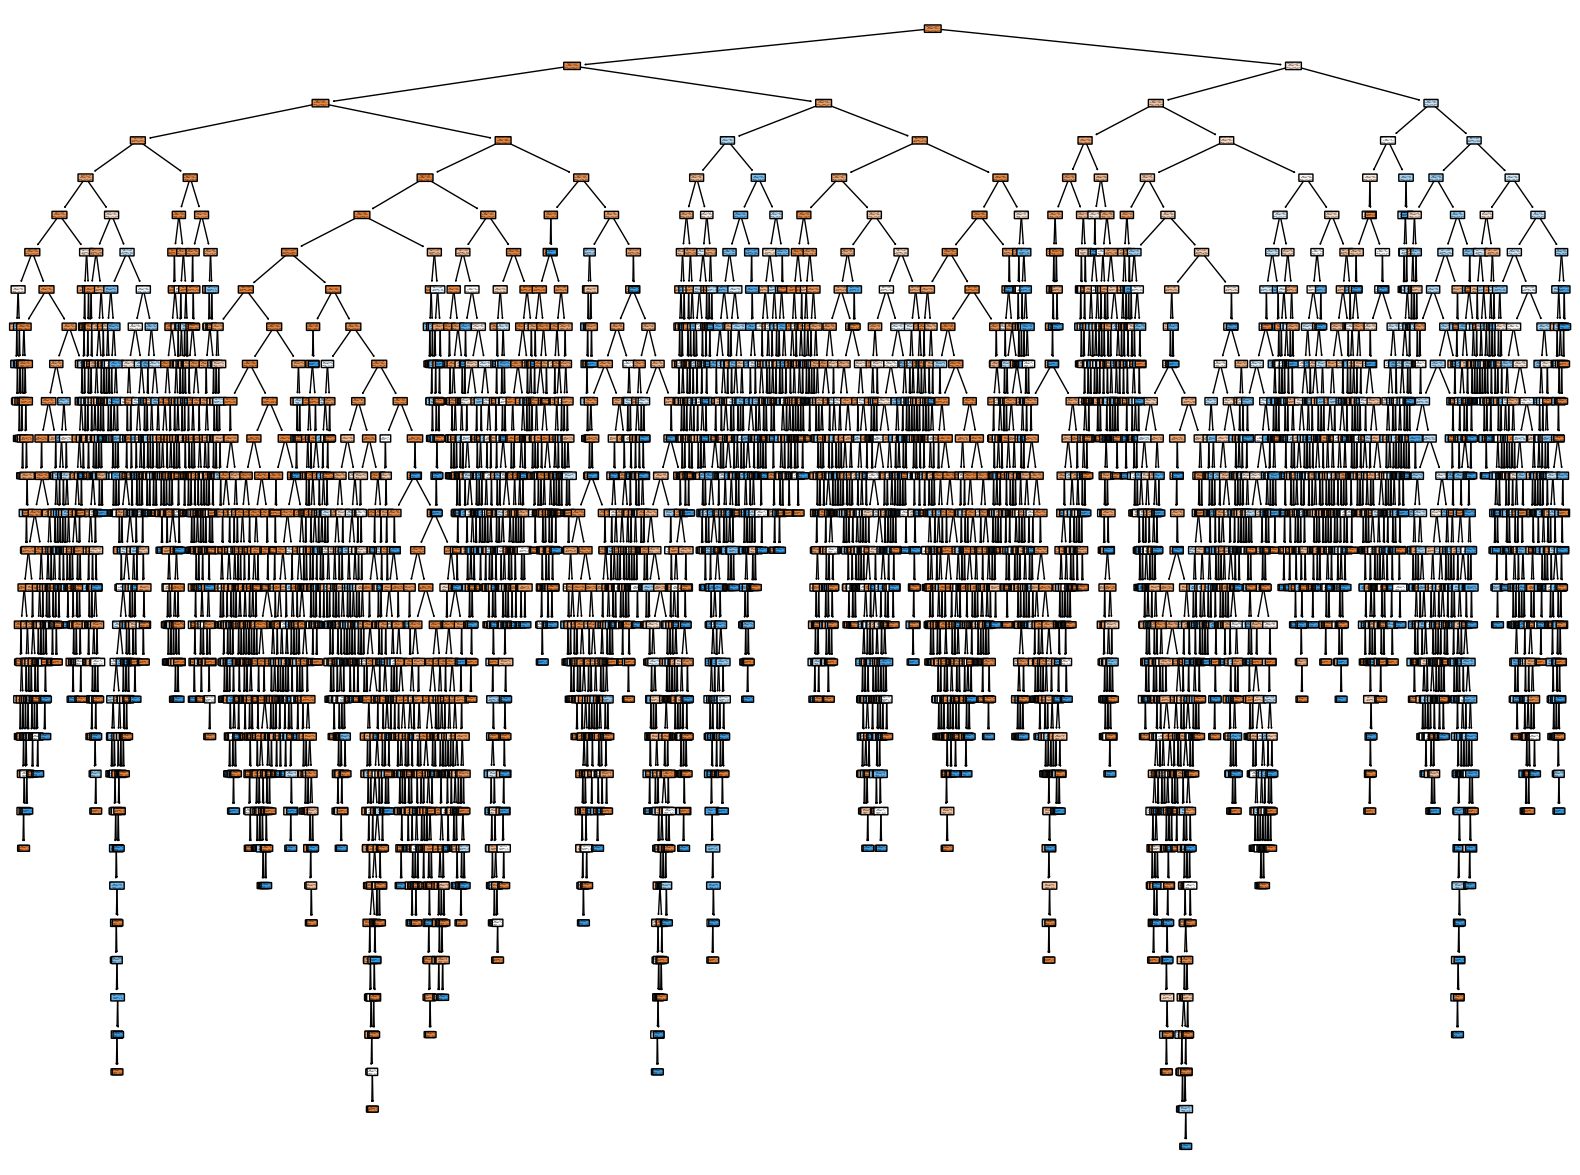

In [28]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(model, feature_names = fitur, class_names = ["Tidak", "Iya"], filled = True, rounded = True)
plt.show()